# Naive Bayes Assignment
## Salary data

Prepare a classification model using Naive Bayes for salary data 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('viridis')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

In [102]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [103]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [104]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [105]:
train_data.duplicated().sum()

3258

In [106]:
train_data.drop_duplicates(inplace=True)

In [107]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [108]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [109]:
test_data.duplicated().sum()

930

In [110]:
test_data.drop_duplicates(inplace=True)

Encoding our target column Salary

In [111]:
le = LabelEncoder()
train_data['Salary'] = le.fit_transform(train_data['Salary'])
test_data['Salary'] = le.transform(test_data['Salary'])

### Data Visualization
We will be joining both datasets for visualization

In [112]:
all_data = pd.concat([train_data,test_data],axis=0)

##### Distribution of Age and Hours per week

(0.0, 9000.0)

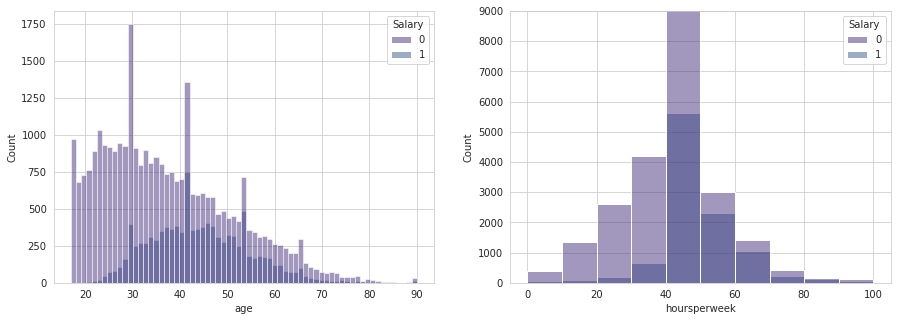

In [113]:
figs, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.histplot(data=all_data,x='age',hue='Salary',ax=axes[0])
sns.histplot(data=all_data,x='hoursperweek',hue='Salary',bins=[0,10,20,30,40,50,60,70,80,90,100],ax=axes[1])
axes[1].set_ylim([0,9000])

##### Comparing counts of Salary within each categories of Race and Sex
From the bar plots below, we can conclude White people and Males have more share of high salaries than others

<AxesSubplot:xlabel='Salary', ylabel='count'>

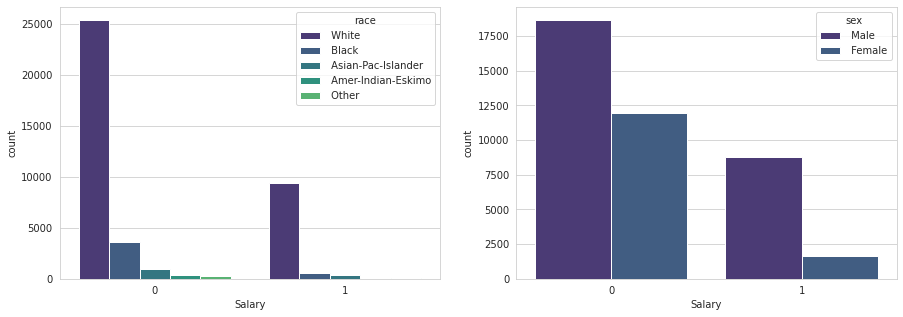

In [114]:
figs, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(data=all_data,x='Salary',hue='race',ax=axes[0])
sns.countplot(data=all_data,x='Salary',hue='sex',ax=axes[1])

Creating custom function to plot categorical variables with percentage of high salary for each category

In [115]:
def plot_by_percentage(column,figsize=(8,5),kind='bar'):
    percentage = all_data.groupby(column)['Salary'].mean().sort_values(ascending=False)*100
    plt.figure(figsize=figsize)
    if kind=='bar':
        sns.barplot(y=percentage.index,x=percentage.values,palette='viridis')
    elif kind=='pie':
        lst = [0.1]
        for i in range(all_data[column].nunique()-1): lst.append(0)
        plt.figure(figsize=figsize)
        ax = plt.subplot(111)
        pd.DataFrame(percentage).plot.pie(y='Salary', legend=False, autopct='%1.1f%%',explode=tuple(lst),shadow=True,startangle=0,ax=ax)

#### Work class
People with self employed company are most likely to have high salary

<Figure size 720x720 with 0 Axes>

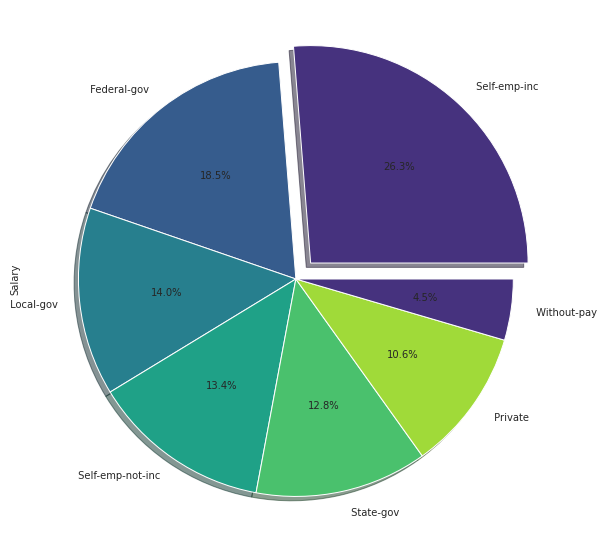

In [116]:
plot_by_percentage('workclass',kind='pie',figsize=(10,10))

##### Education
Being School Proffesor is safe way to achieve high salary

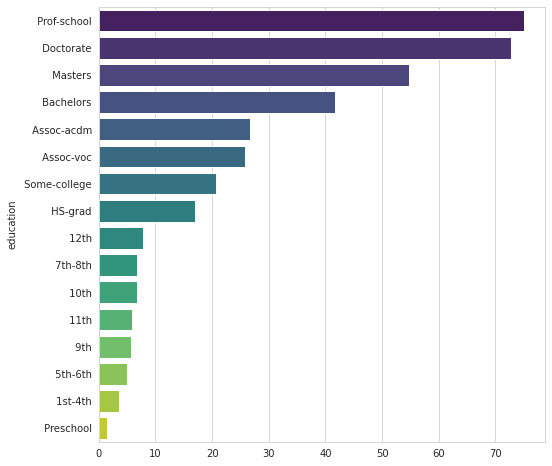

In [117]:
plot_by_percentage('education',figsize=(8,8))

##### Marital Status and Relationship
Married with civilian spouse and Wife are the more Salary makers by percentage

<Figure size 720x720 with 0 Axes>

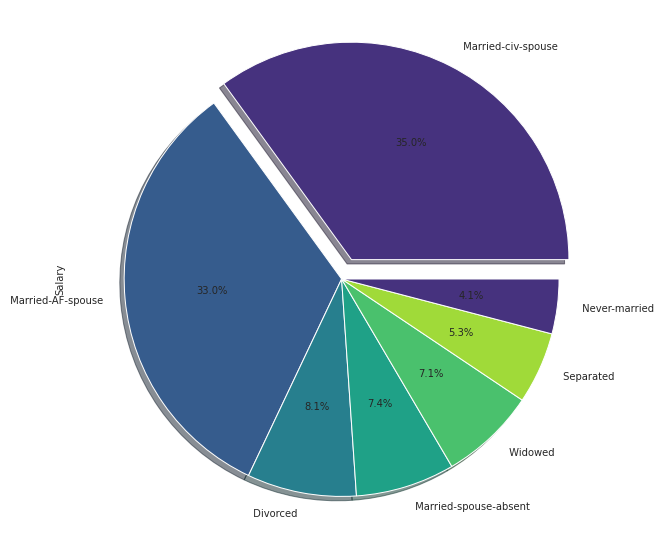

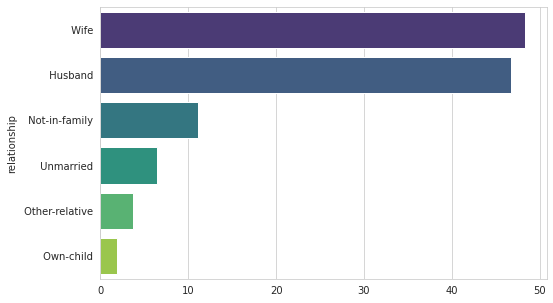

In [118]:
plot_by_percentage('maritalstatus',kind='pie',figsize=(10,10))
plot_by_percentage('relationship')

##### Occupation

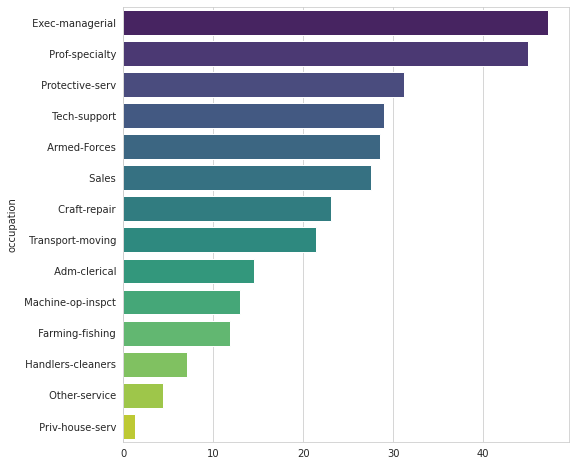

In [119]:
plot_by_percentage('occupation',figsize=(8,8))

##### Native Country

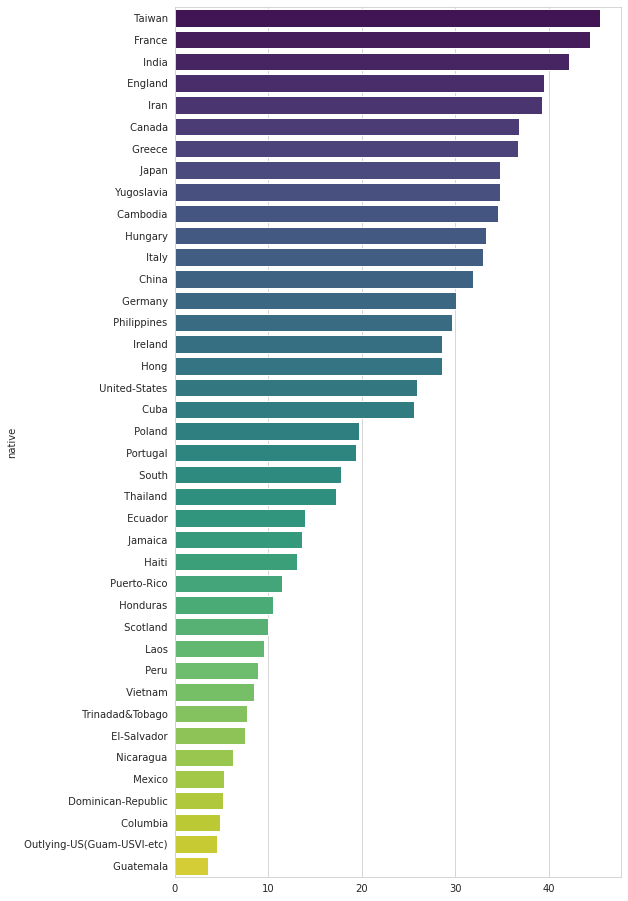

In [120]:
plot_by_percentage('native',figsize=(8,16))

### Preparing data for model building
Dropping unnecessary columns

In [121]:
train_data.drop('education',axis=1,inplace=True)
test_data.drop('education',axis=1,inplace=True)

In [122]:
for col in ['workclass','maritalstatus','occupation','relationship','race','sex','native']:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [123]:
x_train, x_test = train_data.drop('Salary',axis=1), test_data.drop('Salary',axis=1)
y_train, y_test = train_data['Salary'], test_data['Salary']

## Naive Bayes Algorithms
Naive Bayes is a family of probabilistic machine learning algorithms that are based on the Bayes' theorem and assume that the predictors are independent of each other. Here are some of the commonly used Naive Bayes models:

1. Gaussian Naive Bayes: This model assumes that the features follow a Gaussian distribution, also known as a normal distribution.

2. Multinomial Naive Bayes: This model is used for discrete data such as text. It assumes that the features are generated from a multinomial distribution.

3. Bernoulli Naive Bayes: This model is similar to the multinomial Naive Bayes, but it is used for binary or Boolean features.

4. Complement Naive Bayes: This model is an extension of the multinomial Naive Bayes that is designed to handle imbalanced datasets by giving more weight to the minority class.

5. Categorical Naive Bayes: This model is used for categorical data and assumes that the features are generated from a categorical distribution.

#### Gaussian Naive Bayes Model

In [124]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [125]:
y_pred = classifier.predict(x_test)
gauss_accuracy = np.round(accuracy_score(y_test,y_pred)*100,2)
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score:',gauss_accuracy)

Confusion Matrix:
 [[10066   554]
 [ 2358  1152]]
Accuracy Score: 79.39


#### Multinomial Naive Bayes Model

In [126]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [127]:
y_pred = classifier.predict(x_test)
multi_accuracy = np.round(accuracy_score(y_test,y_pred)*100,2)
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score:',multi_accuracy)

Confusion Matrix:
 [[10151   469]
 [ 2733   777]]
Accuracy Score: 77.34


#### Bernoulli Naive Bayes Model

In [128]:
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

BernoulliNB()

In [129]:
y_pred = classifier.predict(x_test)
bern_accuracy = np.round(accuracy_score(y_test,y_pred)*100,2)
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score:',bern_accuracy)

Confusion Matrix:
 [[7723 2897]
 [ 981 2529]]
Accuracy Score: 72.55


#### Complement Naive Bayes Model

In [130]:
classifier = ComplementNB()
classifier.fit(x_train, y_train)

ComplementNB()

In [131]:
y_pred = classifier.predict(x_test)
compl_accuracy = np.round(accuracy_score(y_test,y_pred)*100,2)
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score:',compl_accuracy)

Confusion Matrix:
 [[10151   469]
 [ 2733   777]]
Accuracy Score: 77.34


#### Categorical Naive Bayes Model

In [132]:
classifier = CategoricalNB()
classifier.fit(x_train, y_train)

CategoricalNB()

In [133]:
y_pred = classifier.predict(x_test)
cat_accuracy = np.round(accuracy_score(y_test,y_pred)*100,2)
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Accuracy Score:',cat_accuracy)

Confusion Matrix:
 [[9696  924]
 [1179 2331]]
Accuracy Score: 85.12


#### Summary

In [136]:
df = pd.DataFrame({'accuracy':[gauss_accuracy,multi_accuracy,bern_accuracy,compl_accuracy,cat_accuracy]},
             index=['Gausssian','Multinomial','Bernoulli','Complement','Categorical'])

<AxesSubplot:ylabel='accuracy'>

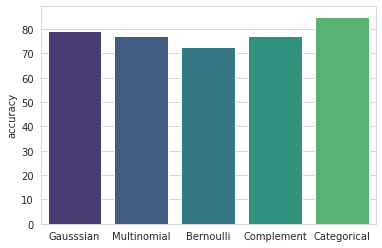

In [138]:
sns.barplot(x=df.index,y=df.accuracy)

**CategoricalNB worked best with our data with 85.12% accuracy**